### Handwritten Character Recognition

#### METADATA
- The dataset would serve beginners in machine learning for there created a predictive model to recognise handwritten characters

In [1]:
#importing necessary basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2

#importing sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#importing keras libraries to implement neural networks/deep learning models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

import random

In [2]:
df = pd.read_csv("A_Z Handwritten Data.csv")

In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [5]:
df1 = df.copy()

In [6]:
df = df.astype('float32')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


we changed the data type to float32 as this reduces memory usage and makes computations easier

splitting the data read into the images and their corresponding labels.
The 0 contained the labels and therefore it was dropped and used to form the y label

In [8]:
x = df.drop('0', axis = 1)
y = df['0']

In [9]:
#reshaping the data so that it can be displayed as images

In [10]:
train_x , test_x , train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 42                                            )

In [11]:
train_x = np.reshape(train_x.values, (train_x.shape[0],28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0],28,28))

In [12]:
print(train_x.shape)
print(test_x.shape)

(297960, 28, 28)
(74490, 28, 28)


In [13]:
#creating a dictionary of words for reference

In [14]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [15]:
y_int = np.int0(y)
count = np.zeros(26, dtype = 'int')
for i in y_int:
    count[i] += 1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

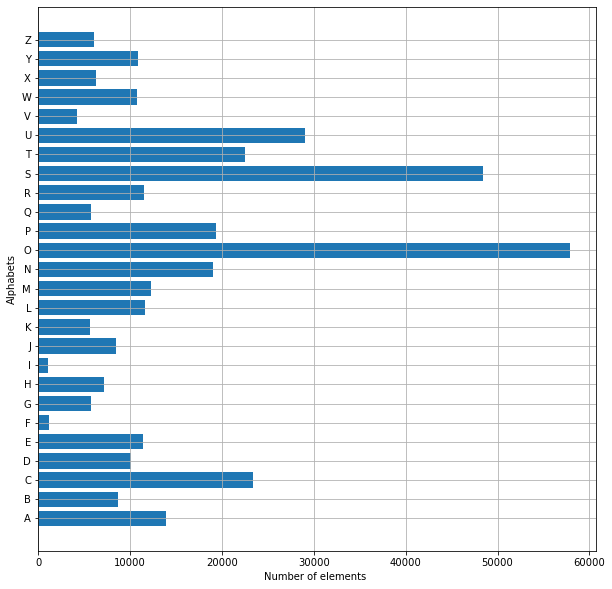

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

shuffling images of the train set ass this hels imporove accuracy of the neural networks

In [17]:
shuffle = shuffle(train_x[0:100])

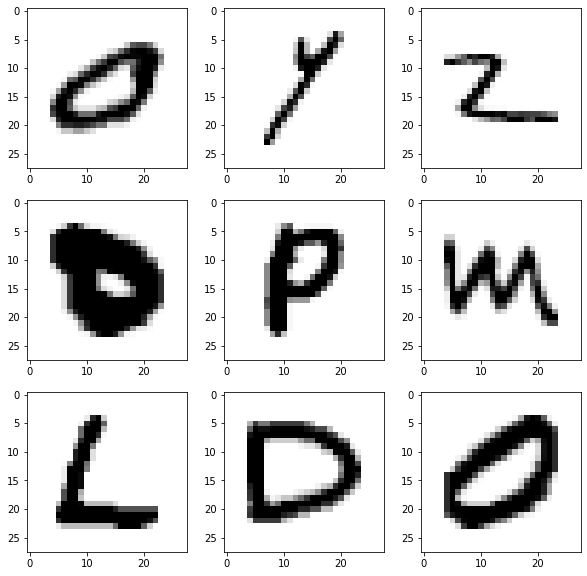

In [18]:
fig,ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle[i], (28,28)), cmap="Greys")
plt.show()

Reshaping the images so that it can be passed throught the model

In [19]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

print("New shape of the train data: ",train_x.shape)
print("New shape of the test data: ",test_x.shape)

New shape of the train data:  (297960, 28, 28, 1)
New shape of the test data:  (74490, 28, 28, 1)


In [20]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')

print("New shape of train labels: ", train_yOHE.shape)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [21]:
# creating a model using convolutional neural networks
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

model.add(Flatten(name = "inputLayer"))

model.add(Dense(64,activation = "relu", name = "HiddenLayer1"))
model.add(Dense(128, activation = "relu", name = "HiddenLayer2"))

model.add(Dense(26, activation = "softmax", name = "OutputLayer"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [22]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
batch_size = 32
epochs = 1

history = model.fit(train_x, train_yOHE, epochs = epochs, batch_size = batch_size, validation_split = 0.1)

8381/8381 [==============================] - 280s 33ms/step - loss: 0.1703 - accuracy: 0.9535 - val_loss: 0.0862 - val_accuracy: 0.9772


In [23]:
model.evaluate(test_x,test_yOHE)

2328/2328 [==============================] - 24s 10ms/step - loss: 0.0781 - accuracy: 0.9789


[0.07806649059057236, 0.9789367914199829]

In [24]:
# trying and using random input from the test set and checking if it is working as expected

Text(0.5, 1.0, 'Prediction: M')

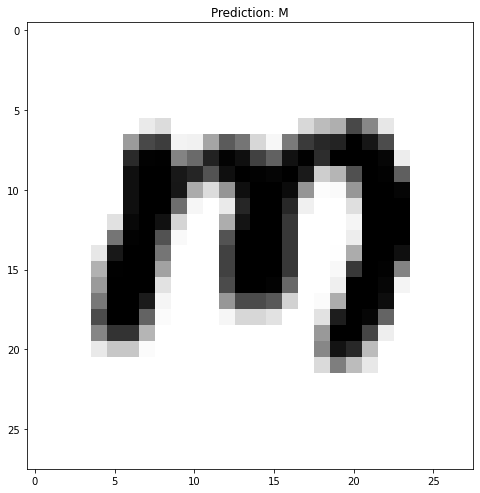

In [25]:
fig, axes = plt.subplots(1,1, figsize=(8,9))
i = random.randint(0,test_x.shape[0])
img = np.reshape(test_x[i], (28,28))
plt.imshow(img, cmap="Greys")    
pred = word_dict[np.argmax(test_yOHE[i])]
plt.title("Prediction: "+pred)

In [ ]:
# we will now try and extend our alpahabet prediction onto an unknown ecternal image using skimage, opencv and cv2

In [33]:
from skimage import io

img = io.imread('https://image.shutterstock.com/image-vector/japanese-calligraphy-alphabetvector-illustration-handwritten-260nw-1785138590.jpg')

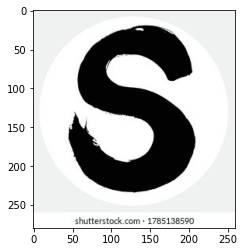

In [34]:
plt.imshow(img,cmap = 'gray')

In [35]:
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [36]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [37]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

1/1 [==============================] - 0s 44ms/step


In [38]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 